In [1]:
cd /content/drive/My Drive/classification

/content/drive/My Drive/classification


In [2]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))


matplotlib: 3.2.2
sklearn: 0.22.2.post1
scipy: 1.4.1
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

Confusion matrix

 [[23  1]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.80      1.00      0.89         4

    accuracy                           0.96        28
   macro avg       0.90      0.98      0.93        28
weighted avg       0.97      0.96      0.97        28

Classification accuracy : 0.9643
Classification error : 0.0357
Precision : 0.8000
True Positive Rate : 1.0000
False Positive Rate : 0.0417
Specificity : 0.9583
Recall or Sensitivity : 1.0000


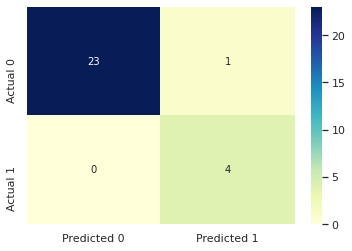

In [6]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

datasets = pd.read_excel('feature_extraction.xls')
X = datasets.iloc[:, [0,14]].values
Y = datasets.iloc[:, 15].values


# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.7, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',  probability=True)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(Y_Set)):
 #   plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
  #              c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('Support Vector Machine (Training set)')
#plt.xlabel('white_pixels')
#plt.ylabel('results')
#plt.legend()
#plt.show()

# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(Y_Set)):
#    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
#                c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('Support Vector Machine (Test set)')
#plt.xlabel('white_pixes')
#plt.ylabel('results')
#plt.legend()
#plt.show()



from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_Test, Y_Pred)

print('Confusion matrix\n\n', cm)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted 0','Predicted 1'], 
                                 index=['Actual 0', 'Actual 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report

print(classification_report(Y_Test, Y_Pred))

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]


# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Area under the ROC curve: 0.8958333333333333


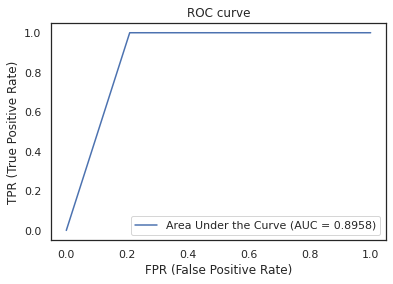

In [ ]:
print ("\nArea under the ROC curve: " +str(roc_auc))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % roc_auc)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
plt.savefig(path+"ROC.png")